In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.environ import make_env
from src.simulator import customer, market, draw1, draw2
import warnings
warnings.filterwarnings("ignore")

In [2]:
environment=make_env('2020-01-01', 200)
environment

,survival,socialization,self_realization,crisis
date,,,,
2020-01-01,1.182223,0.990229,0.714472,0.3
2020-01-02,1.194161,0.978908,0.708260,0.3
2020-01-03,1.174765,1.000318,0.703253,0.3
2020-01-04,1.057658,1.003186,0.764557,0.1
2020-01-05,1.085851,0.998643,0.760830,0.1
...,...,...,...,...
2020-07-14,1.271154,1.091755,0.755530,0.0
2020-07-15,1.363810,1.102890,0.779927,0.0
2020-07-16,1.311233,1.105689,0.784980,0.0


In [3]:
environment=pd.read_csv('data/environment.csv', parse_dates=['date']).set_index('date')
environment.index.min()

Timestamp('2020-01-01 00:00:00')

'''for reality based simulation'''
environment=pd.read_csv('group_expenses.csv', usecols=['date','food','outfit','dwelling','health',
                                                           'beauty','remote','travel','kids','nonfood','telecom','fun','charity'])[:n//2]

cols={'date':environment.date.values}
for i in environment.columns[1:]: # 6536,
    s=[]
    for j in environment.index:
        scale=environment.iloc[j,1:].sum()
        s.append(environment.loc[j, i]/scale)
    cols[i]=Norm01(s)[0]
for i in environment.columns[1:]:
    w=Norm01(environment[i].values)[0]
    environment[i]=w*2.5#MovingAverage(w, numb=len(w)//7)
environment['crisis']=np.zeros(len(environment)).astype(int)
for d in ['2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-01-01']+pd.date_range(start='2020-03-25', periods=20).strftime('%Y-%m-%d').to_list():
    i=environment[environment.date==d].index
    environment.loc[i, 'crisis']=1
environment

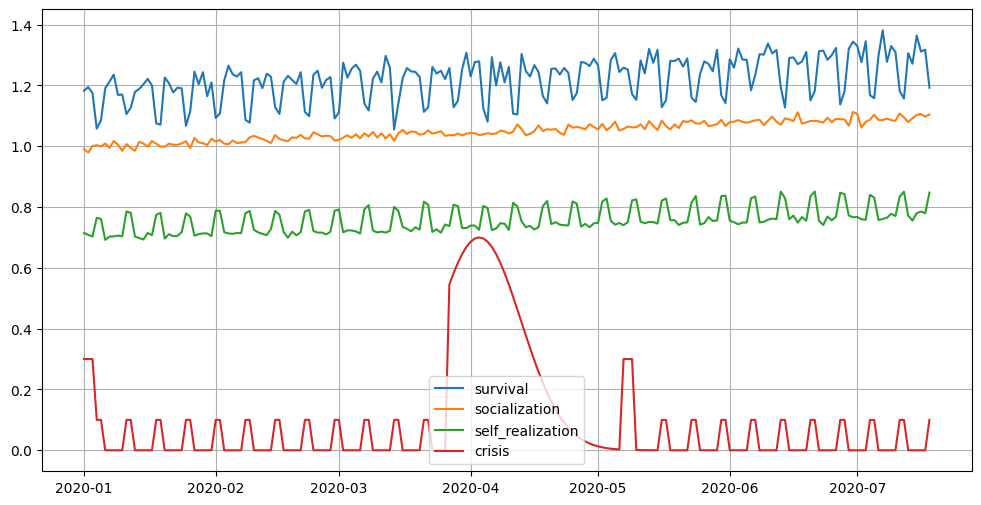

In [3]:
plt.figure(figsize=(12,6))
plt.plot(environment)
plt.legend(environment)
plt.grid()
plt.show()

In [4]:
Fig='''\t   ,,,,,  \n\t Wо(0,0)о \n\t |  \~/   \n\t  \__|__  \n\t   \ : / \ \n\t   (_._)  |\n\t   | _ |  M\n\t   || || \n\t @_/   \_@ \n'''
print(Fig+'Hi! I\'m a simulated consumer!')

	   ,,,,,  
	 Wо(0,0)о 
	 |  \~/   
	  \__|__  
	   \ : / \ 
	   (_._)  |
	   | _ |  M
	   || || 
	 @_/   \_@ 
Hi! I'm a simulated consumer!


In [5]:
cat=np.array(['survival', 'socialization', 'self_realization'])
#np.random.choice(cat[np.in1d(cat,need, invert=True)])
#np.random.randint(10)

'P_reg':1000, 
'k': 0.23,
'R0':200,
'k1':1,
'a':100,
'b':0.27,
'ave_w_sum':1000,
'ave_w_dev':70,
'J0':20,
'Ip': 3,
'Is':5,
'P': 1000,

a = 50,
b=0.08 (или a=100, b = 0.1 —здесь лучше сильно не отклоняться; 
эти значения обеспечивают плавные переход от 0 до 1 вероятности платежа при условии вариации эмоций J от 0 до 100. 
Эмоции могут быть и больше, но тогда вероятность покупки просто обращается в 1.)
k1 — эмоциональная восприимчивость; целесообразно зафиксировать три класса значений: {1; 2; 3} — эти значения выбраны из соображений повышения эмоций за одну итерацию в пределах выбранного диапазона J(t)\in [0; 100].
Начальное значение эмоций при этом целесообразно выбирать в пределах [1; 50] или даже [1; 30]\subset\mathbb{R}.
Значения R, r, k — ориентируясь на данные; 
порядок R~[1000—3000], r~[100—300], k~[1—5—7] 
(насколько заранее идём в магазин, зная, что запасы заканчиваются; какая доля среднедневного оборота должна остаться — k*r).

In [6]:
'''Check up, how it works'''
c=customer('n1', environment)
d=c.time_step() 
c.prop['survival'], d, np.array(list(d.values()))
# d={'survival': 3860, 'socialization': 5000}
# c.prop['wealth']=4500
c.prop['wealth'], d, market(c,d), c.prop['wealth']

(16907.28108212958, {}, {}, 16907.28108212958)

In [7]:
"""creating a population"""
N=1000
populus=[customer('Cust'+str(i).zfill(4), environment) for i in range(N)]
# db=live_period(c1, False)
# print('Wealth %.2f; Salary %.2f'%(c1.prop['wealth']/1000, c1.prop['salary']/1000))
for i in range(10):
    print(populus[i].day)

2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00
2020-01-01 00:00:00


In [8]:
db=pd.DataFrame(columns=['day','id','survival', 'socialization', 'self_realization'])
days=180
for d in range(days):
    print('day %i'%d, end='; ')
    for c in populus:
        purch=c.time_step()
        a={'day':c.day, 'id':c.id}
        #purch=market(c, c.time_step())
        a.update(purch)
        db=pd.concat([db, pd.DataFrame(a, index=[0])], ignore_index=True)
db

day 0; day 1; day 2; day 3; day 4; day 5; day 6; day 7; day 8; day 9; day 10; day 11; day 12; day 13; day 14; day 15; day 16; day 17; day 18; day 19; day 20; day 21; day 22; day 23; day 24; day 25; day 26; day 27; day 28; day 29; day 30; day 31; day 32; day 33; day 34; day 35; day 36; day 37; day 38; day 39; day 40; day 41; day 42; day 43; day 44; day 45; day 46; day 47; day 48; day 49; day 50; day 51; day 52; day 53; day 54; day 55; day 56; day 57; day 58; day 59; day 60; day 61; day 62; day 63; day 64; day 65; day 66; day 67; day 68; day 69; day 70; day 71; day 72; day 73; day 74; day 75; day 76; day 77; day 78; day 79; day 80; day 81; day 82; day 83; day 84; day 85; day 86; day 87; day 88; day 89; day 90; day 91; day 92; day 93; day 94; day 95; day 96; day 97; day 98; day 99; day 100; day 101; day 102; day 103; day 104; day 105; day 106; day 107; day 108; day 109; day 110; day 111; day 112; day 113; day 114; day 115; day 116; day 117; day 118; day 119; day 120; day 121; day 122; day

,day,id,survival,socialization,self_realization
0,2020-01-02,Cust0000,NaN,NaN,NaN
1,2020-01-02,Cust0001,3700.022669,1276.880511,642.971096
2,2020-01-02,Cust0002,3754.600484,NaN,NaN
3,2020-01-02,Cust0003,404.119553,NaN,NaN
4,2020-01-02,Cust0004,2482.604115,NaN,NaN
...,...,...,...,...,...
179995,2020-06-29,Cust0995,1149.566796,4900.629923,NaN
179996,2020-06-29,Cust0996,NaN,NaN,NaN
179997,2020-06-29,Cust0997,NaN,NaN,NaN
179998,2020-06-29,Cust0998,1393.755738,3218.121573,NaN


<AxesSubplot:xlabel='day'>

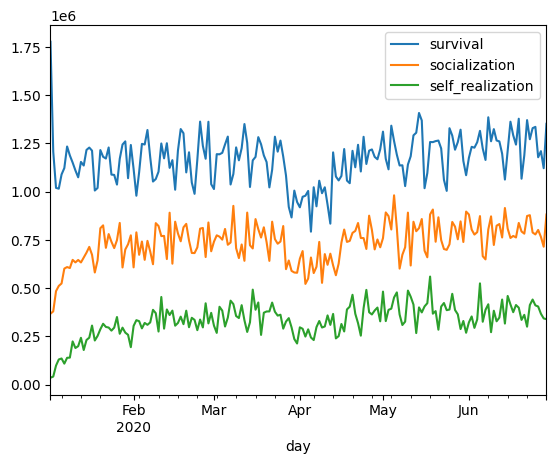

In [9]:
db.groupby('day')[cat].sum().plot()

<AxesSubplot:xlabel='day'>

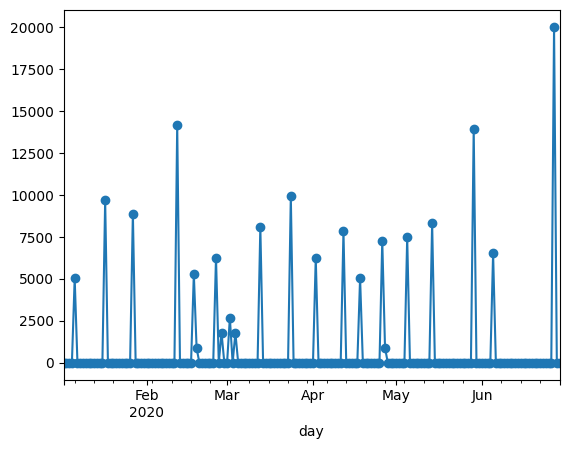

In [10]:
db[db.id=='Cust0555'].fillna(value=0.).set_index('day').socialization.plot(marker='o')

795402.2880286017

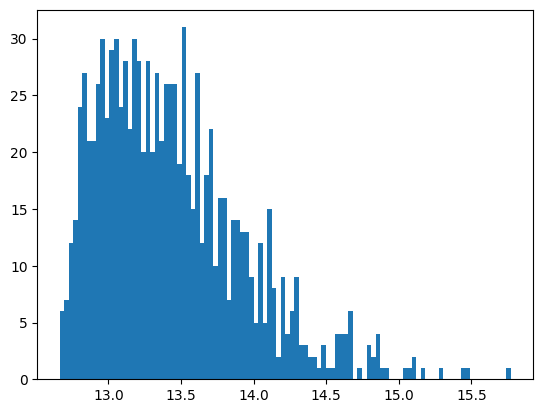

In [11]:
w=np.array([i.prop['wealth'] for i in populus])
plt.hist(np.log(w), bins=100)
w.mean()

0.5904386791329692


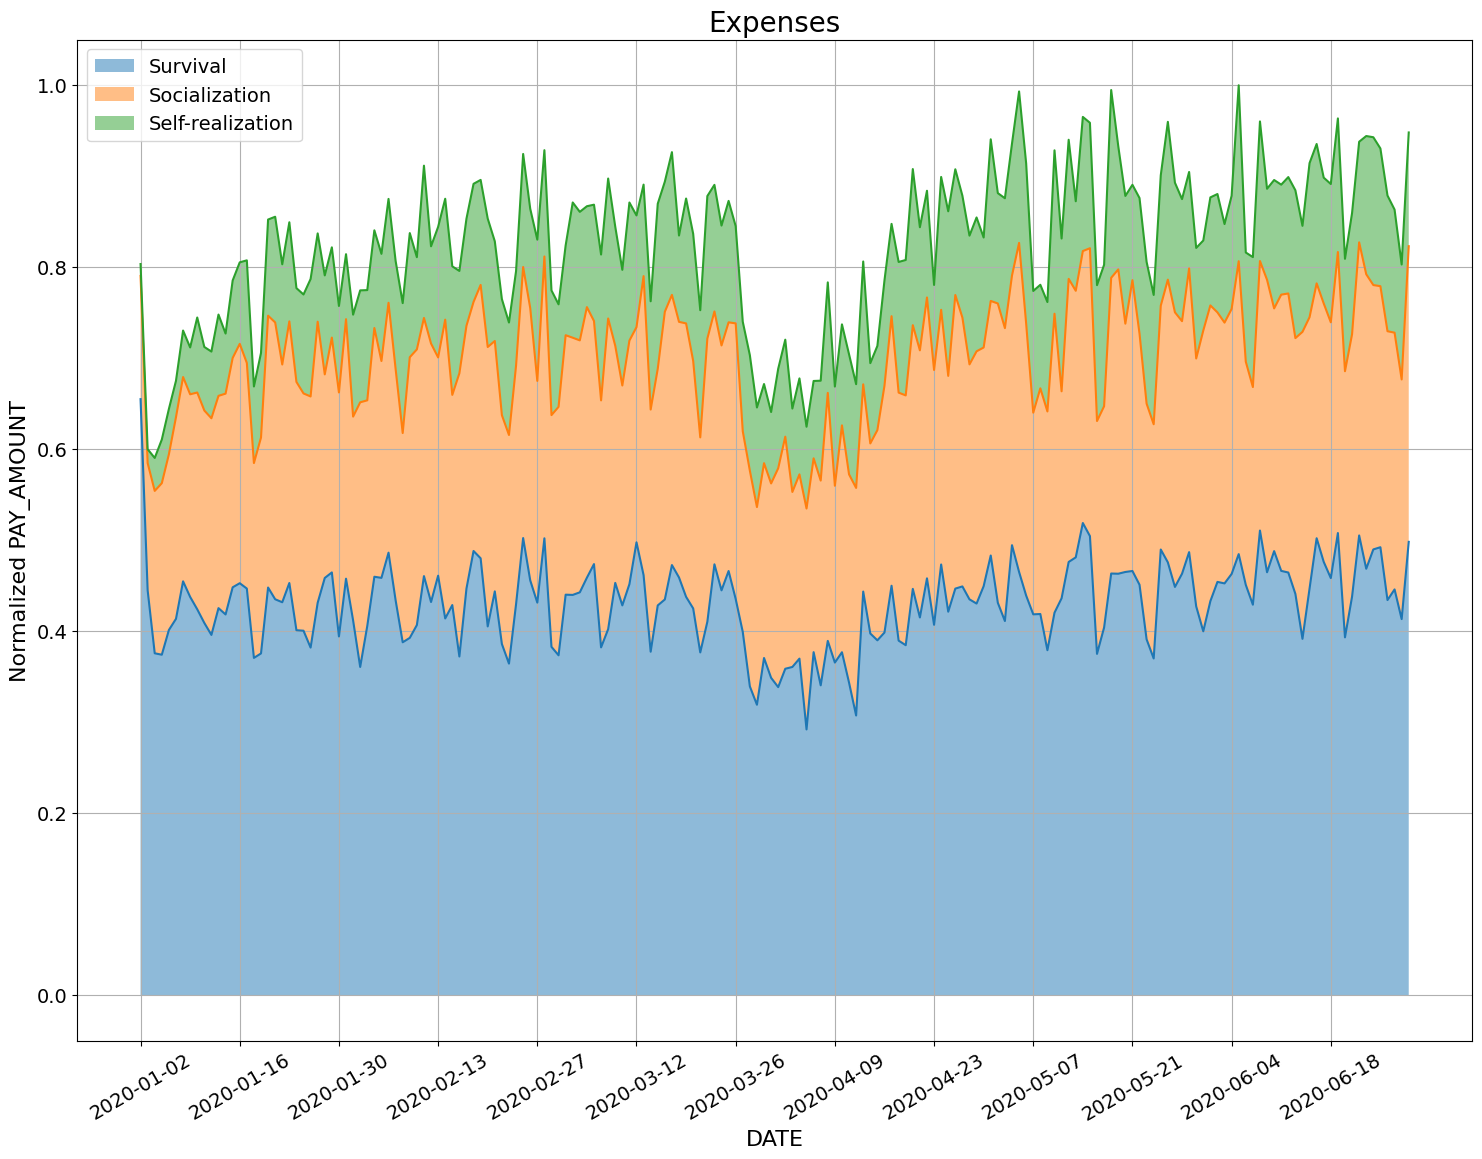

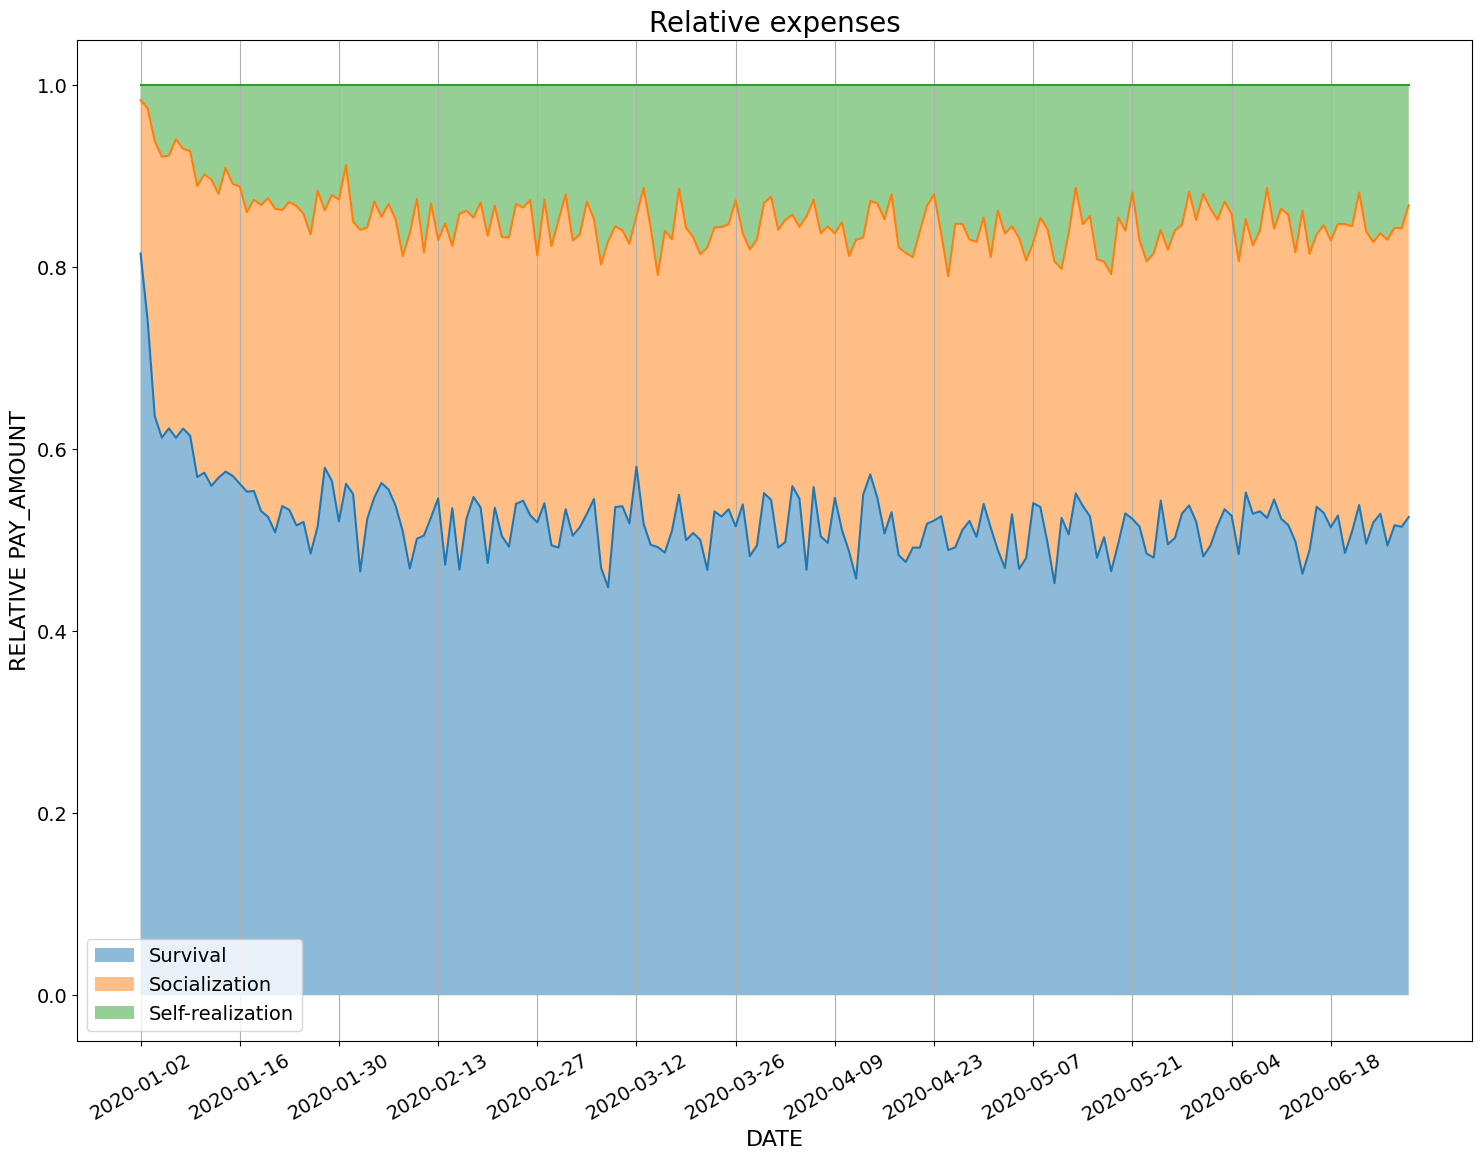

In [12]:
draw1(db.groupby('day')[cat].sum())
draw2(db.groupby('day')[cat].sum())

In [13]:
#db.to_csv('simulated1000.csv', index=False)